In [1]:
from ldaa import *
from generator import *

In [2]:
gene = generator(10,500,np.ones(10)/20,80)

In [3]:
gene.make_parameter()

array([[1.06376893e-02, 9.46389878e-03, 1.02302377e-02, ...,
        1.54546909e-04, 6.35529914e-04, 7.78285314e-05],
       [5.63234206e-04, 3.18243863e-04, 5.78960692e-04, ...,
        9.15000649e-04, 5.40547384e-04, 8.61208505e-04],
       [2.09019182e-05, 1.04010578e-03, 7.76360752e-05, ...,
        1.12244922e-03, 4.32178661e-04, 6.58754119e-04],
       ...,
       [1.17267921e-03, 7.08326684e-04, 1.22338458e-05, ...,
        2.99543228e-06, 1.92174284e-03, 1.34498681e-04],
       [7.88688931e-04, 4.55502118e-04, 2.46468744e-03, ...,
        5.56358167e-04, 3.60308810e-04, 2.08386687e-04],
       [5.49832662e-04, 1.73231158e-04, 1.84858146e-03, ...,
        1.71547019e-02, 1.33456798e-02, 1.28552051e-02]])

In [4]:
docs = gene.sample(100)

In [5]:
model = LDA(10,500)

In [6]:
%%timeit 
phi_post,gamma_post,alpha_post,beta_post = model.fit_numba(docs)

C:\Users\xas_x\OneDrive\桌面\663\LDA-with-python\ldaa.py:243: RuntimeWarning: divide by zero encountered in double_scalars
  c = np.sum(df / d2f) / (1 / z + np.sum(1 / d2f))
C:\Users\xas_x\OneDrive\桌面\663\LDA-with-python\ldaa.py:218: RuntimeWarning: invalid value encountered in subtract
  return M * (digamma(np.sum(a)) - (digamma(a))) + np.sum(ss, axis=0)
C:\Users\xas_x\OneDrive\桌面\663\LDA-with-python\ldaa.py:243: RuntimeWarning: divide by zero encountered in true_divide
  c = np.sum(df / d2f) / (1 / z + np.sum(1 / d2f))
C:\Users\xas_x\OneDrive\桌面\663\LDA-with-python\ldaa.py:243: RuntimeWarning: invalid value encountered in double_scalars
  c = np.sum(df / d2f) / (1 / z + np.sum(1 / d2f))


35min 23s ± 15min 54s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit phi_post1,gamma_post1,alpha_post1,beta_post1 = model.fit(docs)

4min 34s ± 10.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
phi_post,gamma_post,alpha_post,beta_post = model.fit_numba(docs)

step 0
finished E
finished M
step 1
finished E
finished M
step 2
finished E
finished M
step 3
finished E
finished M
step 4
finished E
finished M
step 5
finished E
finished M
step 6
finished E
finished M
step 7
finished E
finished M
step 8
finished E
finished M
step 9
finished E
finished M
step 10
finished E
finished M
step 11
finished E
finished M
step 12
finished E
finished M
step 13
finished E
finished M
step 14
finished E
finished M
step 15
finished E
finished M
step 16
finished E
finished M
step 17
finished E
finished M
step 18
finished E
finished M
step 19
finished E
finished M
step 20
finished E
finished M
step 21
finished E
finished M
step 22
finished E
finished M
step 23
finished E
finished M
step 24
finished E
finished M
step 25
finished E
finished M
step 26
finished E
finished M
step 27
finished E
finished M
step 28
finished E
finished M
step 29
finished E
finished M
step 30
finished E
finished M
step 31
finished E
finished M
step 32
finished E
finished M
step 33
finished E
f

In [22]:
phi_post1,gamma_post1,alpha_post1,beta_post1 = model.fit(docs)

step 0
finished E
finished M
step 1
finished E
finished M
step 2
finished E
finished M
step 3
finished E
finished M
step 4
finished E
finished M
step 5
finished E
finished M
step 6
finished E
finished M
step 7
finished E
finished M
step 8
finished E
finished M
step 9
finished E
finished M
step 10
finished E
finished M
step 11
finished E
finished M
step 12
finished E
finished M
step 13
finished E
finished M
step 14
finished E
finished M
step 15
finished E
finished M
step 16
finished E
finished M
step 17
finished E
finished M
step 18
finished E
finished M
step 19
finished E
finished M
step 20
finished E
finished M
step 21
finished E
finished M
step 22
finished E
finished M
step 23
finished E
finished M
step 24
finished E
finished M
step 25
finished E
finished M
step 26
finished E
finished M
step 27
finished E
finished M
step 28
finished E
finished M
step 29
finished E
finished M
step 30
finished E
finished M
step 31
finished E
finished M
step 32
finished E
finished M
step 33
finished E
f

We can see that after the optimization the running time of the same document increases nearly 500% percent

In [25]:
import matplotlib.pyplot as plt

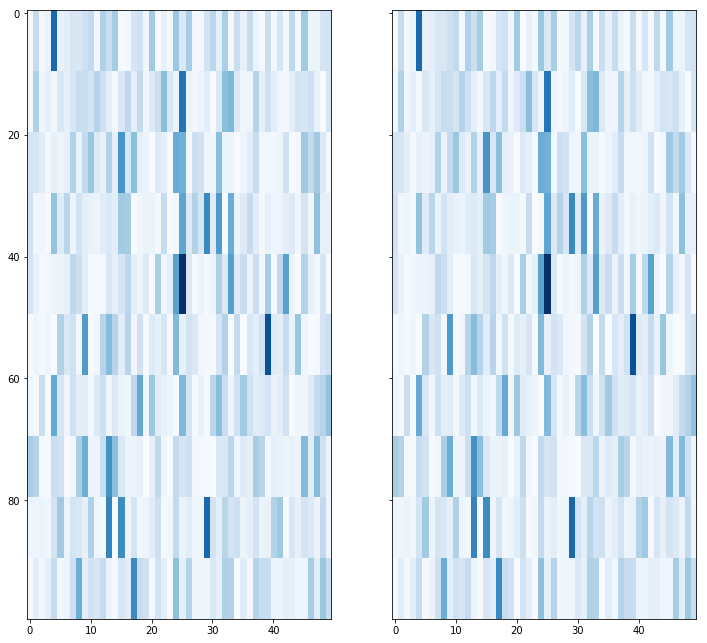

In [33]:
p1 = np.repeat(beta_post, 10, axis=0)
p2 = np.repeat(beta_post1, 10, axis=0)
p = [p1,p2] 
fig, axes = plt.subplots(1, 2, figsize=(12,12), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Blues')
pass

And after evaluating the value of two posterior Betas we can see from the above two plots they yield the same value. Therefore, within the same output, the speed increases 500%. 